In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('Mall_Customer.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)

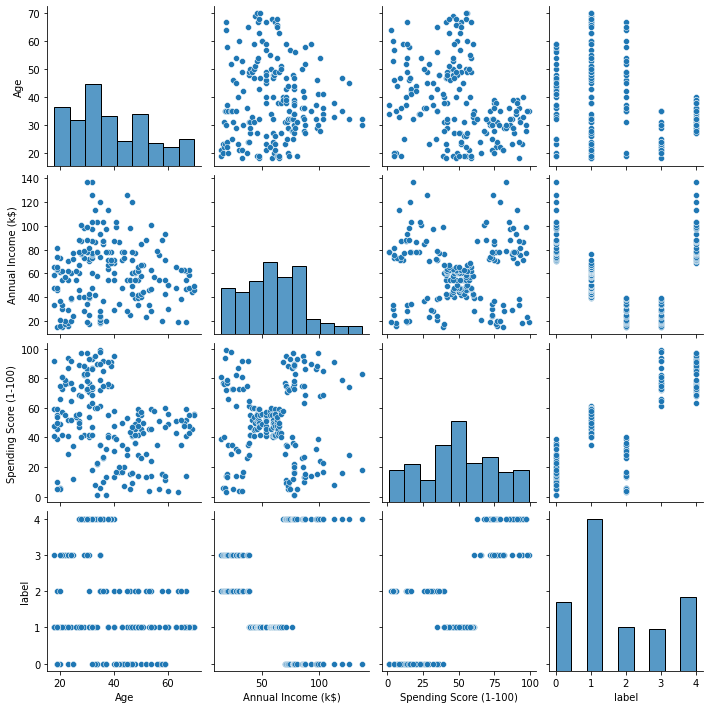

In [17]:
sns.pairplot(df)
df.shape

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [6]:
df[['Gender', 'Spending Score (1-100)']].groupby(['Gender'], as_index=False).mean().sort_values(by='Spending Score (1-100)', ascending=False)

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


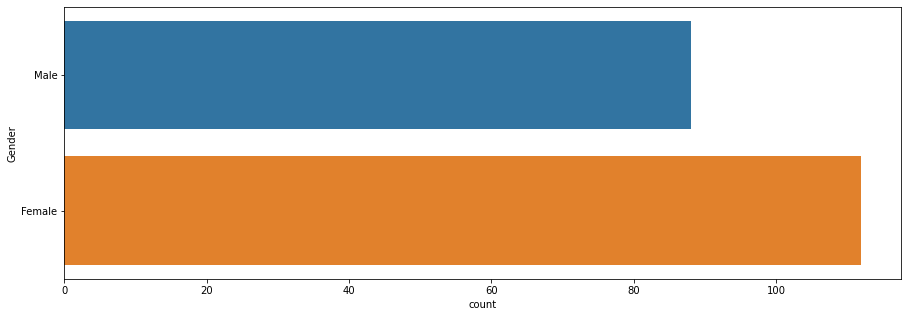

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=df)
plt.show()


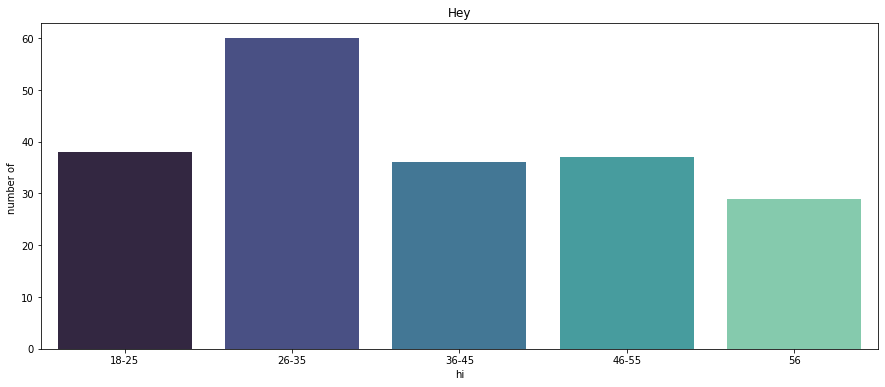

In [8]:
age_18_25=df.Age[(df.Age >=18) & (df.Age <=25)]
age_26_35=df.Age[(df.Age >=26) & (df.Age <=35)]
age_36_45=df.Age[(df.Age >=36) & (df.Age <=45)]
age_46_55=df.Age[(df.Age >=46) & (df.Age <=55)]
age_56=df.Age[(df.Age>=56)]

agex=['18-25','26-35','36-45','46-55','56']
rege=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=rege,palette='mako')
plt.xlabel('hi')
plt.ylabel("number of ")
plt.title('Hey')
plt.show()


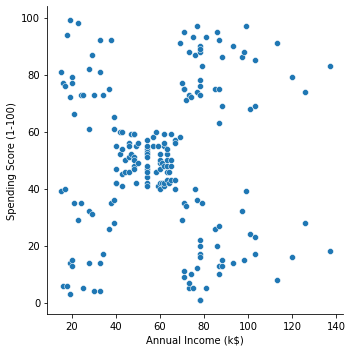

In [9]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

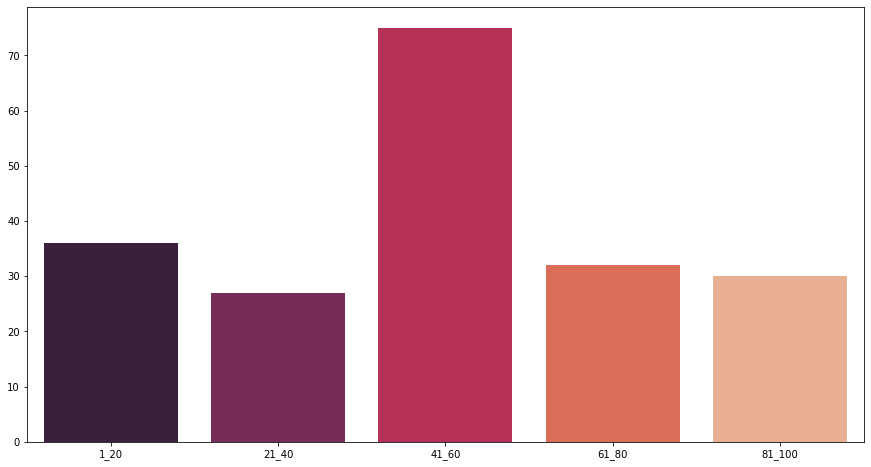

In [10]:
s_1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
s_21_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21) & (df["Spending Score (1-100)"] <=40)]
s_41_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41) & (df["Spending Score (1-100)"] <=60)]
s_61_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61) & (df["Spending Score (1-100)"] <=80)]
s_81_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81) & (df["Spending Score (1-100)"] <=100)]

sxc=["1_20","21_40","41_60","61_80","81_100"]
syc=[len(s_1_20.values),len(s_21_40.values),len(s_41_60.values),len(s_61_80.values),len(s_81_100.values)]
plt.figure(figsize=(15,8))
sns.barplot(x=sxc,y=syc,palette="rocket")
plt.show


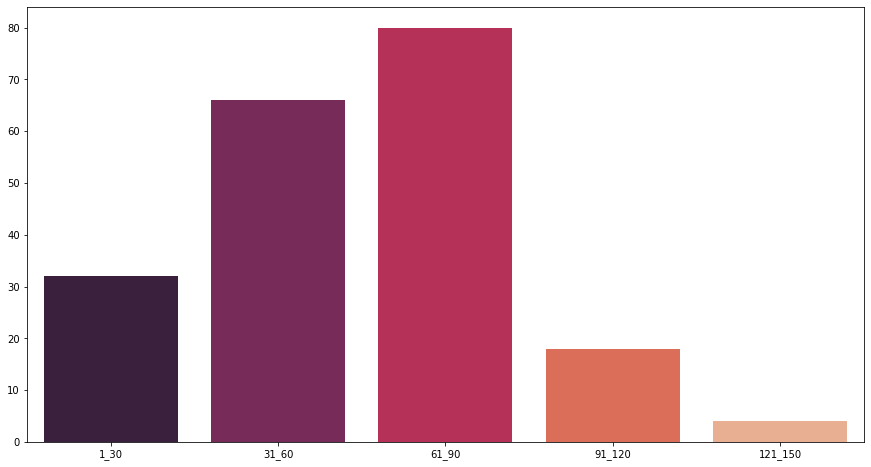

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
anu_1_30=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=1) & (df["Annual Income (k$)"] <=30)]
anu_31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31) & (df["Annual Income (k$)"] <=60)]
anu_61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61) & (df["Annual Income (k$)"] <=90)]
anu_91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91) & (df["Annual Income (k$)"] <=120)]
anu_121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"] >=121) & (df["Annual Income (k$)"] <=150)]

anx=["1_30","31_60","61_90","91_120","121_150"]
anxy=[len(anu_1_30.values),len(anu_31_60.values),len(anu_61_90.values),len(anu_91_120.values),len(anu_121_150.values)]
plt.figure(figsize=(15,8))
sns.barplot(x=anx,y=anxy,palette="rocket")
plt.show()
df.head()


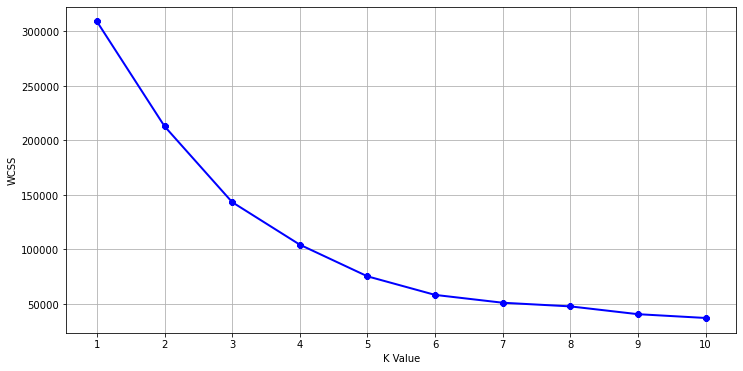

In [15]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()
    
    

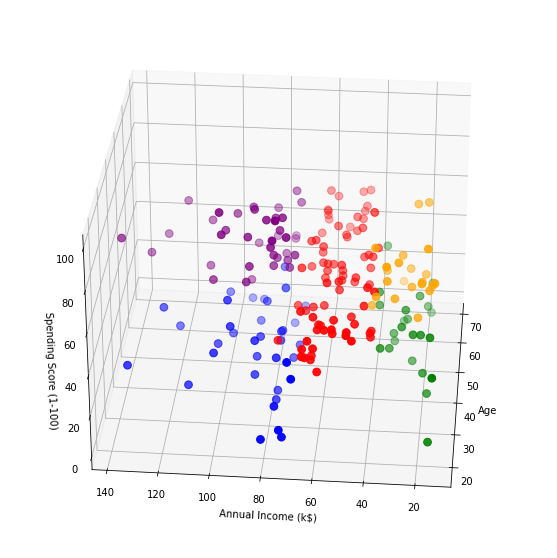

In [14]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

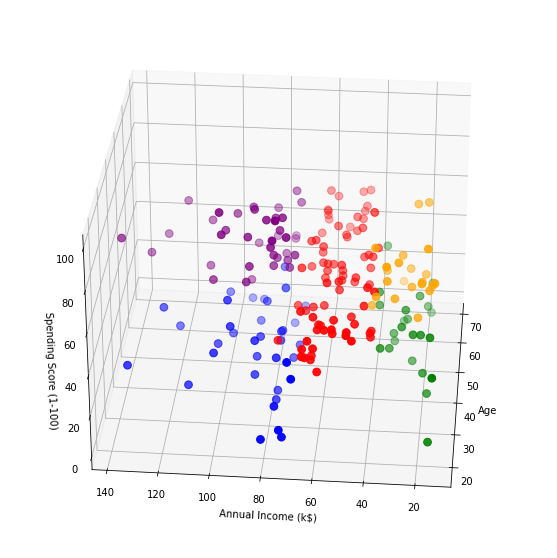

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
